### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-09,461849,5064692,757651,609756,290110,142556,132491,244588,118970,96968,87558,127610,127551,4849,200469
2021-11-10,462189,5072805,759277,610036,290110,142772,132551,245794,119003,97203,87617,127640,127686,4849,200532
2021-11-11,462690,5080351,760037,610224,290630,142971,132618,247000,119021,97394,87647,127680,127809,4849,200554
2021-11-12,463245,5089008,762520,610491,290630,143116,132686,248203,119069,97623,87673,127721,127918,4849,200573
2021-11-13,463530,5095849,762972,611222,290872,143274,132739,249415,119085,97677,87673,127766,128042,4849,200605


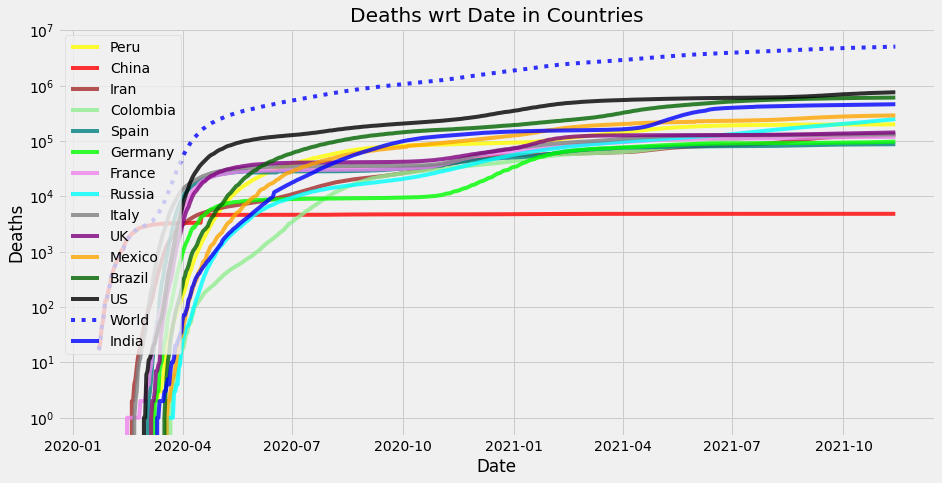

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-09,11466,479447,79978,10948,4473,32899,6111,37999,12565,41286,0,2199,8305,55,0
2021-11-10,13091,573376,96313,12273,0,39699,8033,36896,11945,51077,6461,2461,7948,69,2239
2021-11-11,12516,516662,58626,15300,7049,43511,8697,39584,12643,48834,4286,2644,7539,99,1237
2021-11-12,11850,585343,139775,14598,0,39149,8522,38941,3887,45356,4353,2559,7322,76,1148
2021-11-13,11271,444258,59198,14642,3353,37807,8539,38068,14676,34309,0,2513,4306,91,1034


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-09,14440,442428,79075,11462,3865,37752,4459,35513,6701,20147,2083,1711,10083,61,767
2021-11-10,14350,451158,80224,11516,3607,37882,4697,35605,7051,22209,2375,1761,9940,62,865
2021-11-11,14228,455525,78784,11768,3836,38257,4963,35870,7424,23984,2502,1820,9780,64,890
2021-11-12,14069,464180,82850,11957,3581,38317,5201,36075,7188,25408,2626,1869,9616,65,907
2021-11-13,13883,462852,81273,12136,3565,38283,5423,36208,7687,26002,2451,1912,9262,67,915


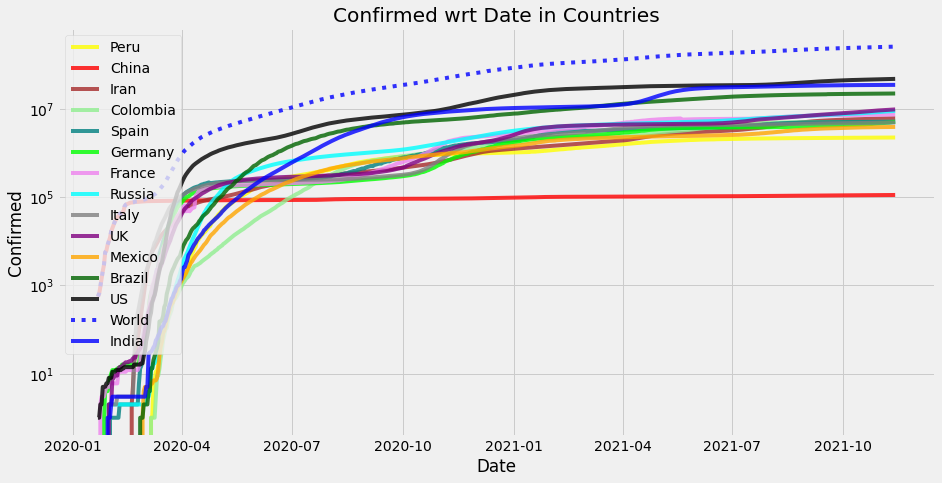

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-09,460,8164,1431,183,376,263,68,1183,46,237,0,39,112,0,0
2021-11-10,340,8113,1626,280,0,216,60,1206,33,235,59,30,135,0,63
2021-11-11,501,7546,760,188,520,199,67,1206,18,191,30,40,123,0,22
2021-11-12,555,8657,2483,267,0,145,68,1203,48,229,26,41,109,0,19
2021-11-13,285,6841,452,731,242,158,53,1212,16,54,0,45,124,0,32


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-09,398.06,7006.16,1194.98,242.98,236.08,157.80,42.38,1130.17,35.97,119.19,21.67,35.42,143.84,0.0,24.84
2021-11-10,390.80,7144.52,1248.86,247.61,206.57,165.08,44.58,1139.65,35.60,133.67,26.33,34.75,142.73,0.0,29.61
2021-11-11,404.58,7194.70,1187.75,240.16,245.75,169.32,47.39,1147.94,33.40,140.83,26.79,35.40,140.27,0.0,28.66
2021-11-12,423.38,7377.49,1349.66,243.51,215.03,166.28,49.96,1154.83,35.22,151.85,26.69,36.10,136.36,0.0,27.45
2021-11-13,406.08,7310.43,1237.45,304.45,218.40,165.24,50.34,1161.97,32.82,139.62,23.36,37.21,134.81,0.0,28.02


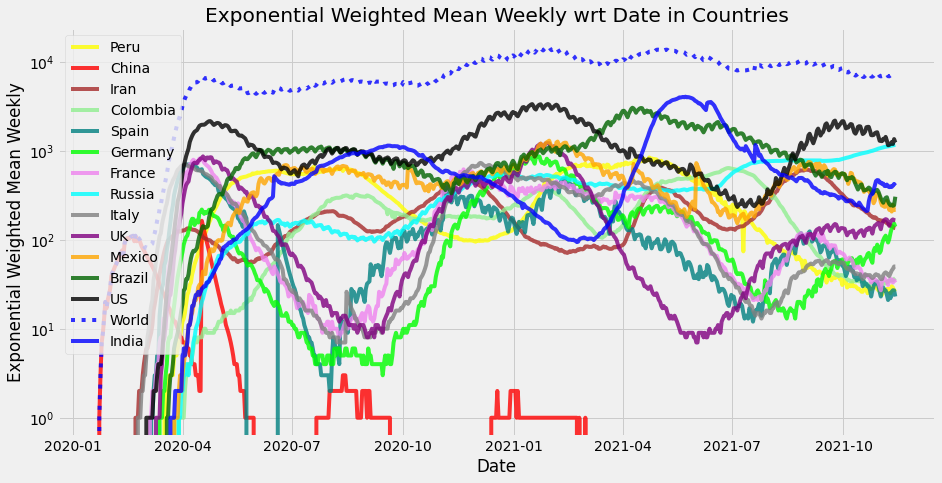

In [18]:
plotter(np.round(AVG), name)

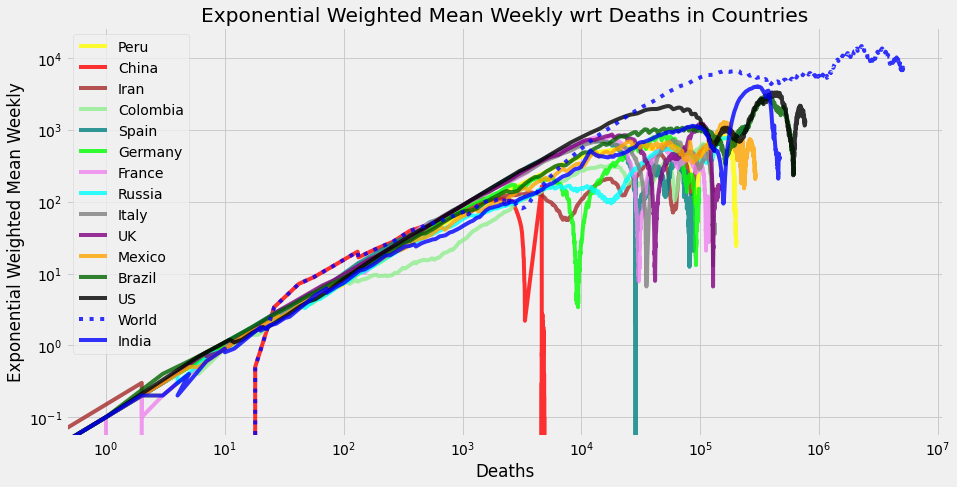

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

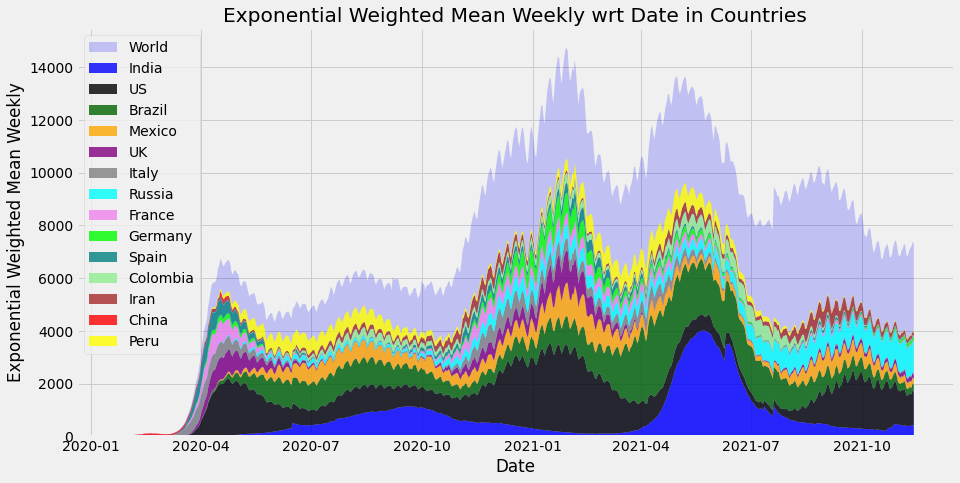

In [20]:
stackplotter(AVG, name)

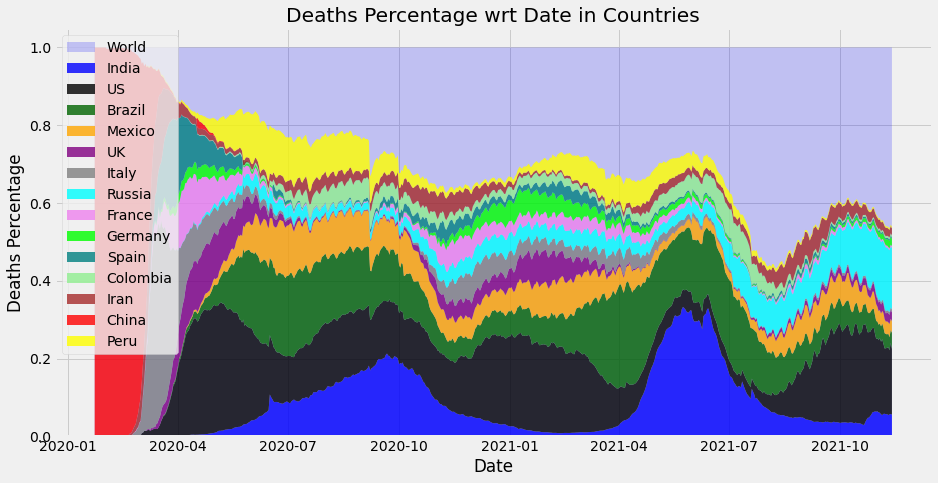

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

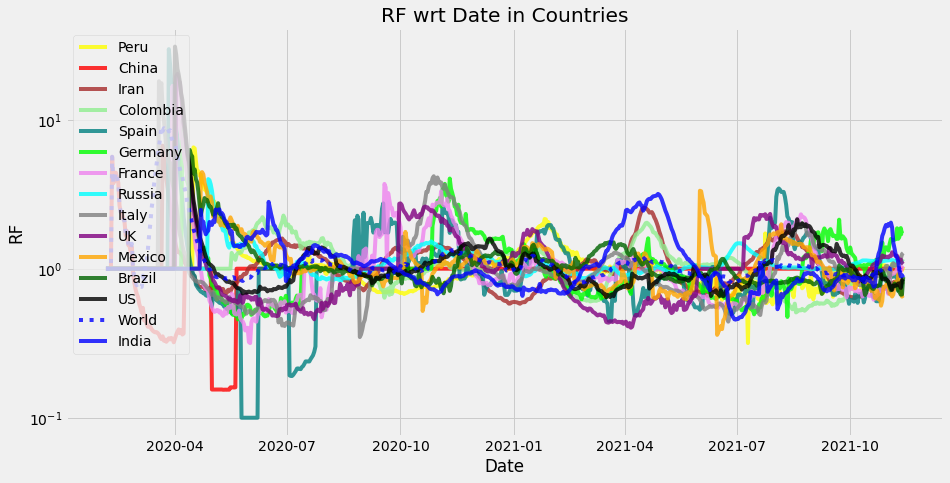

In [23]:
plotter(Reproductivity, 'RF')

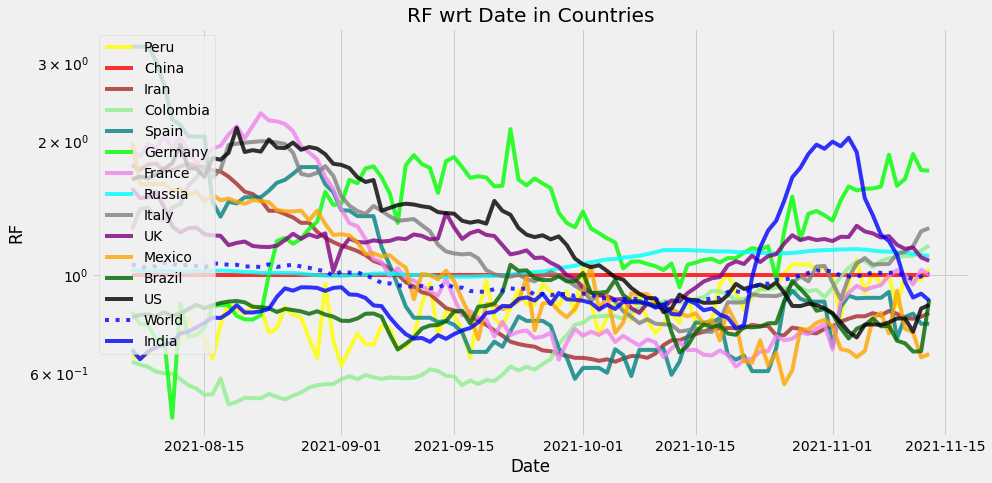

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

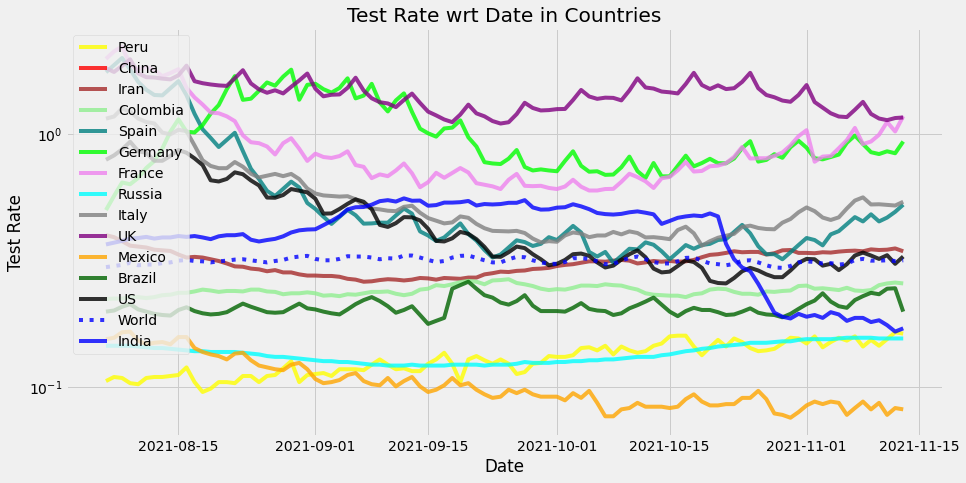

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

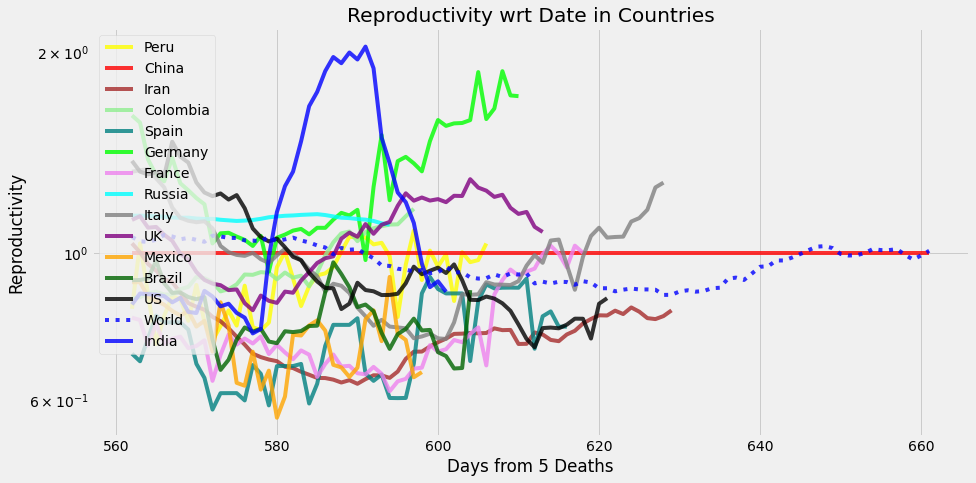

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

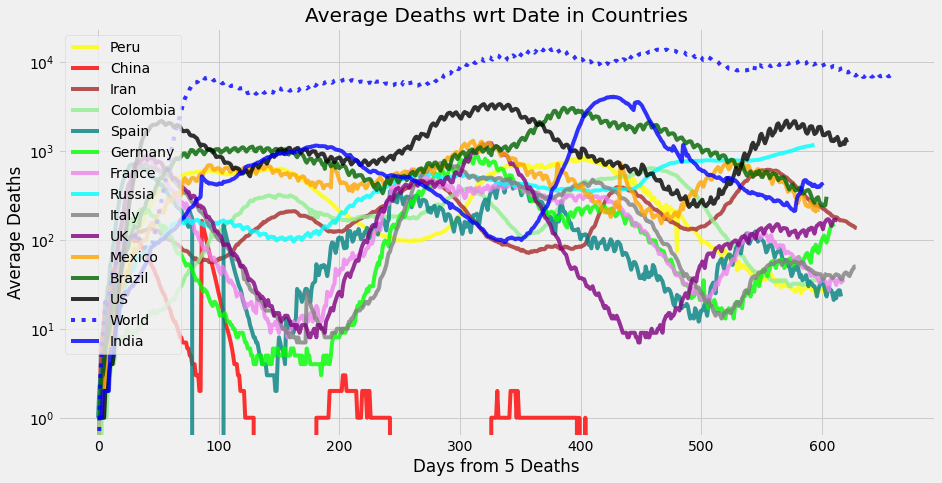

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

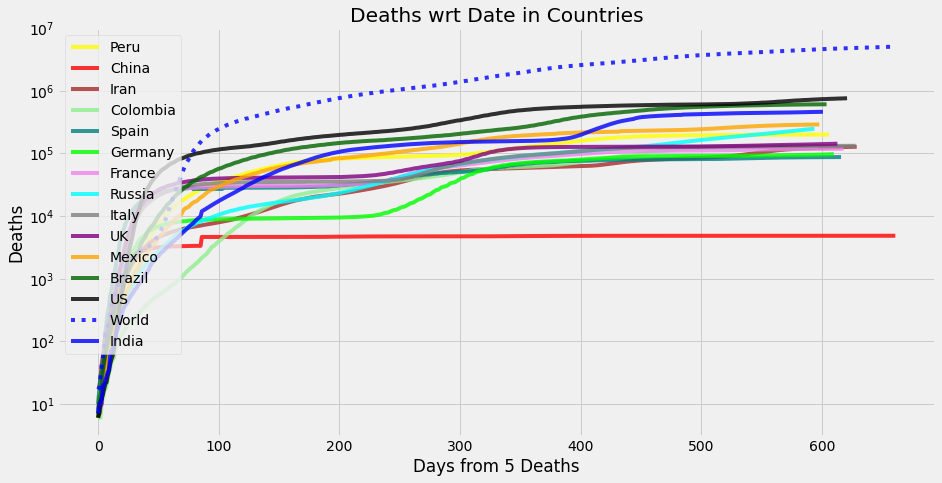

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5095849,6841,7203.29,7310.43,1.0067,252970612,0.317,462852,1019.17
US,762972,452,1158.14,1237.45,0.8544,47050502,0.328,81273,152.59
Brazil,611222,731,262.00,304.45,0.8787,21953838,0.199,12136,122.24
India,463530,285,391.29,406.08,0.8738,34437307,0.171,13883,92.71
Mexico,290872,242,171.14,218.40,0.6618,3841661,0.082,3565,58.17
Russia,249415,1212,1188.57,1161.97,1.1021,8881306,0.156,36208,49.88
Peru,200605,32,28.00,28.02,1.0324,2213548,0.163,915,40.12
Indonesia,143644,16,15.71,20.35,0.5530,4250516,0.198,807,28.73
UK,143274,158,157.14,165.24,1.0744,9572351,1.158,38283,28.65


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5095849,6841,7203.29,7310.43,1.0067,252970612,0.317,462852,1019.17
Russia,249415,1212,1188.57,1161.97,1.1021,8881306,0.156,36208,49.88
US,762972,452,1158.14,1237.45,0.8544,47050502,0.328,81273,152.59
Ukraine,81054,724,697.00,677.29,1.2858,3353694,0.155,20940,16.21
India,463530,285,391.29,406.08,0.8738,34437307,0.171,13883,92.71
Romania,52836,323,336.29,375.65,0.9190,1739283,0.119,8943,10.57
Brazil,611222,731,262.00,304.45,0.8787,21953838,0.199,12136,122.24
Turkey,73342,215,202.14,208.30,0.9792,8388512,0.648,26986,14.67
Mexico,290872,242,171.14,218.40,0.6618,3841661,0.082,3565,58.17


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5095849


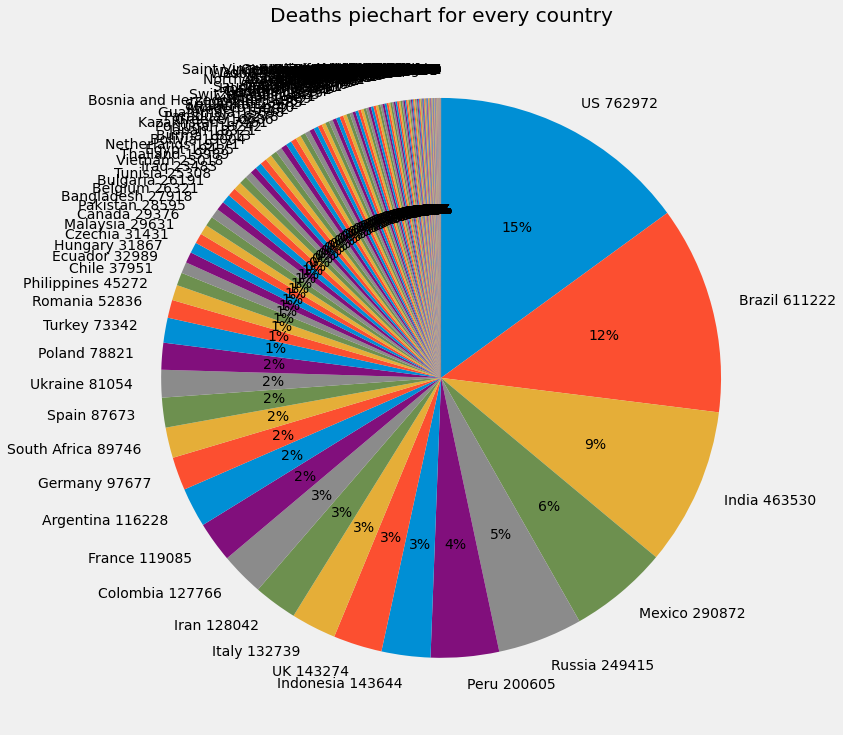

In [35]:
piechart('Deaths')

World total:  7203


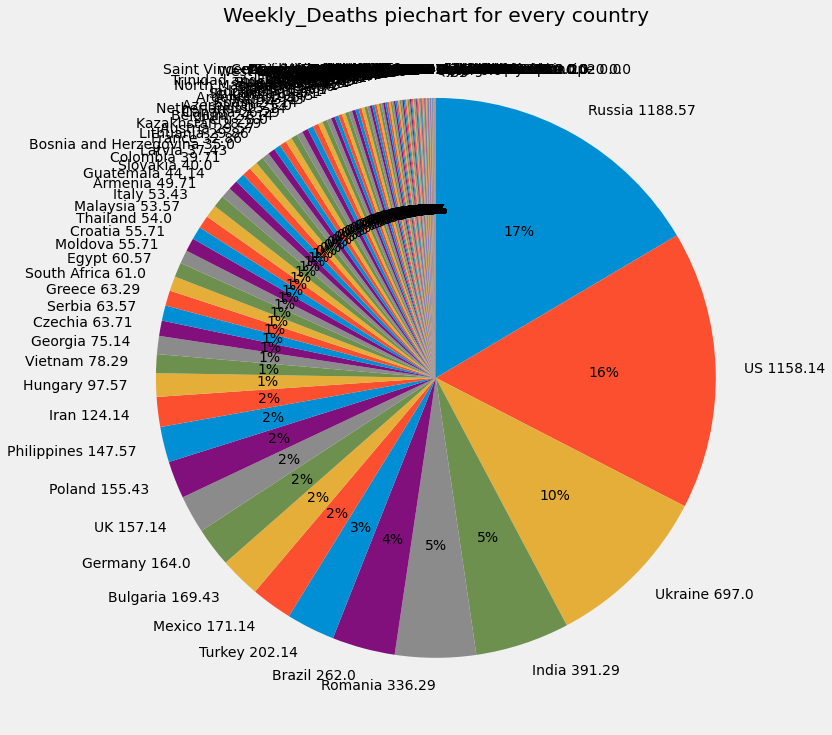

In [36]:
piechart('Weekly_Deaths')

World total:  6841


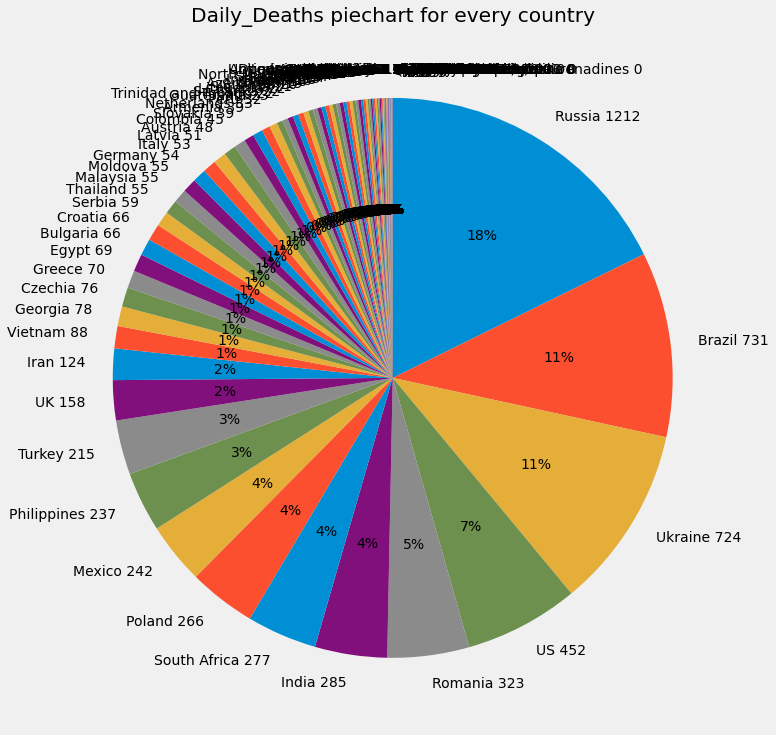

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-11-15


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1019169800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 3f35849] `date` update
 1 file changed, 2132 insertions(+), 2132 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (66%)


To https://github.com/Arrowheadahp/COVID-19.git
   bbd187e..3f35849  master -> master
